<a href="https://colab.research.google.com/github/hsnam95/my/blob/main/gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic models with Gensim

### Downloading necessary files
* **recipes.csv:** recipes - a list of recipes (but only with ingredient names)
* **state-of-the-union.csv:** State of the Union addresses - each presidential address from 1970 to 2012


In [60]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/recipes.csv -P data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv -P data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


File ‘data/recipes.csv’ already there; not retrieving.

File ‘data/state-of-the-union.csv’ already there; not retrieving.



### Data cleaning

In [63]:
# necessary to downgrade pandas under 2.0 for pyLDAvis
!pip install "pandas<2.0.0" 

import pandas as pd
df = pd.read_csv("data/state-of-the-union.csv")
# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
df.content = df.content.str.replace("[^A-Za-z ]", " ")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-63-b5b1b77ef5e5>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df.content = df.content.str.replace("[^A-Za-z ]", " ")


,year,content
0,1790,George Washington January Fellow Citi...
1,1790,State of the Union Address George Washington ...
2,1791,State of the Union Address George Washington ...
3,1792,State of the Union Address George Washington ...
4,1793,State of the Union Address George Washington ...


### Explore data with Wordcloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


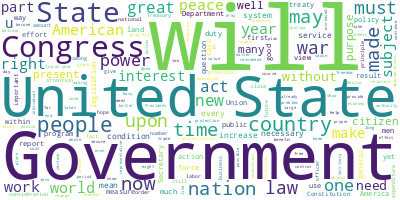

In [64]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df.content.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Prepare data for LDA

gensim.utils.simple_preprocess convert a document into a list of tokens. This lowercases, tokenizes, de-accents (optional)

In [65]:
from gensim.utils import simple_preprocess
df.content = df.content.apply(simple_preprocess)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


remove stopwords

In [66]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'to']) # add more if want
df.content = df.content.apply(lambda words: [word for word in words if word not in stop_words])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Using LDA with Gensim

In [ ]:
texts = df.content
from gensim import corpora
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in texts]

In [68]:
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
from gensim import models
n_topics = 15
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
lda_model.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.003*"mexico" + 0.002*"per" + 0.002*"convention" + 0.001*"today" + 0.001*"minister" + 0.001*"help" + 0.001*"americans" + 0.001*"indians" + 0.001*"court" + 0.001*"products"'),
 (1,
  '0.003*"help" + 0.002*"americans" + 0.002*"million" + 0.002*"program" + 0.002*"mexico" + 0.002*"programs" + 0.002*"billion" + 0.002*"budget" + 0.002*"tonight" + 0.002*"percent"'),
 (2,
  '0.002*"mexico" + 0.002*"help" + 0.002*"program" + 0.002*"cent" + 0.001*"per" + 0.001*"courts" + 0.001*"gold" + 0.001*"spain" + 0.001*"million" + 0.001*"islands"'),
 (3,
  '0.002*"help" + 0.002*"mexico" + 0.002*"program" + 0.002*"americans" + 0.001*"spain" + 0.001*"convention" + 0.001*"budget" + 0.001*"tonight" + 0.001*"minister" + 0.001*"today"'),
 (4,
  '0.002*"per" + 0.002*"program" + 0.002*"spain" + 0.002*"mexico" + 0.002*"court" + 0.001*"budget" + 0.001*"help" + 0.001*"indians" + 0.001*"americans" + 0.001*"banks"'),
 (5,
  '0.003*"americans" + 0.002*"help" + 0.002*"program" + 0.002*"mexico" + 0.002*"programs" 

In [71]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.005140 -0.001080       1        1  24.150405
1     -0.006702  0.001731       2        1  14.308286
9      0.003082  0.000215       3        1  13.233656
11    -0.008286 -0.002816       4        1  13.231831
10     0.002591  0.001638       5        1   8.221499
0      0.004953  0.002121       6        1   6.636478
5     -0.001670  0.000974       7        1   4.540484
13     0.002683  0.000646       8        1   4.152377
14     0.001629 -0.001287       9        1   3.463573
3     -0.000195  0.001466      10        1   2.747344
2      0.002171 -0.003343      11        1   2.430519
6     -0.003658  0.004503      12        1   1.452519
7     -0.000888 -0.002260      13        1   0.680116
8      0.001593 -0.000920      14        1   0.452778
12    -0.002445 -0.001586      15        1   0.298138, topic_info=           Term        Freq       Total Category  logprob  loglift
8694    program  727.000000  727.000000  Default  30.0000  30.0000
3953     mexico  806.000000  806.000000  Default  29.0000  29.0000
2730  americans  720.000000  720.000000  Default  28.0000  28.0000
7376       help  773.000000  773.000000  Default  27.0000  27.0000
2671    million  597.000000  597.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1947      spain    1.178298  499.143849  Topic15  -6.9289  -0.2335
8073      today    1.164351  465.785711  Topic15  -6.9408  -0.1762
790       court    1.171154  493.028710  Topic15  -6.9350  -0.2272
2053    islands    1.129377  380.945243  Topic15  -6.9713  -0.0056
1893   minister    1.146367  481.362473  Topic15  -6.9564  -0.2247

[1340 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
8354      1  0.110040  acceleration
8354      2  0.220081  acceleration
8354      3  0.110040  acceleration
8354      4  0.220081  acceleration
8354      5  0.110040  acceleration
...     ...       ...           ...
8446      6  0.054392         zones
8446      7  0.054392         zones
8446      8  0.054392         zones
8446      9  0.054392         zones
8446     10  0.054392         zones

[9099 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 10, 12, 11, 1, 6, 14, 15, 4, 3, 7, 8, 9, 13])